# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 6</center>

# <center>Linear Regression for Supervised Learning</center>

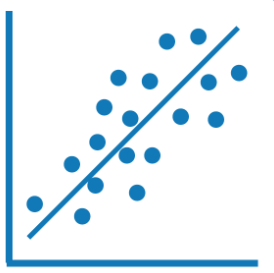

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Creating Simple Linear Model</li>
<li> Explore Linear Model attributes</li>
<li> Find MSE </li>
<li> Make Predictions for simple linear model</li>
<li> Create Multiple Linear Model </li>
<li> Make Predictions for multiple linear model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use sklearn library to create first machine learning model and implement sklearn LinearRegression model for both univariate and mulitple features.

By the end of the lab, you should be able to :
- Load required dataset and library for training machine learning model


- Implement sklearn LinearRegression algorithm for simple linear model as well as multiple linear model.


- Find MSE for the created model


- Make prediction for unseen data

## <font color = blue>1. Loading Data

    - Load boston housing data from sklearn.datasets module. Create dataframe from the boston data.

In [6]:
import pandas as pd
import numpy as np

In [7]:
#solution
import warnings
from sklearn.datasets import load_boston
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    housing= load_boston()
    data = housing.data

cf = pd.DataFrame(data=data)
cf

0     1      2    3      4      5     6       7    8      9     10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         11    12  
0    396.90  4.98  
1    396.90  9.14  
2    392.83  4.03  
3    394.63  2.94  
4    396.90  5.33  
..      ...   ...  
501  391.99  9.67  
502  396.90  9.08  
503  396.90  5.64  
504  393.45  6.48  
505  396.90  7.88  

[506 rows x 13 columns]

In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\yuadh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [9]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [10]:
df['target'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

## <font color = blue>2. Creating simple Linear Model

INSTRUCTIONS:-
    
- The boston dataset contain many features. To implement simple linear regression model, let us choose any one feature that is mostly related to the target feature. 
    
    
- Use dataframe `corr()` method to check correlation between each features with target feature. Use heatmap to display the correlation.
    
    
- Which feature is mostly related to the target feature? Choose that feature to create linear Model.
    
    
- Import `LinearRegression()` from sklearn `linear_model` module. Create LinearRegression() object and fit the dataset to train the model


In [11]:
#Solution
df.corr()


CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
target  -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
target   0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

<AxesSubplot:>

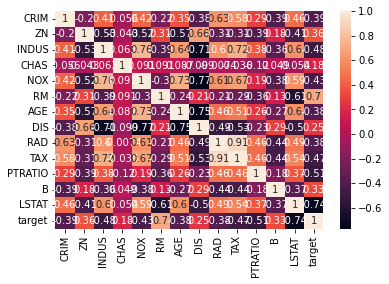

In [12]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [13]:
from sklearn.linear_model import LinearRegression
#create linear regression model
lr = LinearRegression()


In [14]:
#Using 2-D features
X = df[['RM']]
y = df.target

#Train model using fit methods
lr.fit(X,y)

LinearRegression()

In [15]:
#Using numpy array
A = np.array(df.RM).reshape(-1,1)
b = df.target
lr.fit(A,b)

LinearRegression()

## <font color = blue>3. Explore Linear Model attributes


In [16]:
#use coef_ attributes to get weights. We have only one weights since it is simple linear model
#W
lr.coef_

array([9.10210898])

In [17]:
#use intercept_ attributes to get the bias value
#B
lr.intercept_

-34.670620776438554

In [18]:
# f(y) = Wx + B
y_hat = lr.coef_*df.RM[0]+lr.intercept_
y_hat-df.target[0]

array([1.17574577])

## <font color = blue>4. Find MSE
- sklearn provides `mean_squared_error()` method to check MSE for a given model. `mean_squared_error()` expect y_prediction and actual y value as its paramters. use linear model's `predict()` method to get y_prediction.
    
 `sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)`

In [19]:
#creating y_pred
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X)
y_pred

C:\Users\yuadh\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([25.17574577, 23.77402099, 30.72803225, 29.02593787, 30.38215211,
       23.85593997, 20.05125842, 21.50759586, 16.5833549 , 19.97844155,
       23.3735282 , 20.02395209, 18.93169901, 19.47782555, 20.81583557,
       18.43108302, 19.35039603, 19.85101202, 14.99048582, 17.45715736,
       16.02812625, 19.6234593 , 21.23453259, 18.23993873, 19.25027283,
       16.29208741, 18.23993873, 20.36983223, 24.44757706, 26.07685456,
       17.32972783, 20.59738496, 19.48692766, 17.22050253, 20.81583557,
       19.33219181, 18.49479778, 18.57671676, 19.63256141, 25.35778795,
       29.26259271, 26.95065703, 21.48028953, 21.86257811, 20.57007863,
       17.04756245, 17.99418179, 20.21509638, 14.47166561, 16.31939374,
       19.60525508, 20.98877564, 24.5932108 , 19.92382889, 18.9225969 ,
       31.31056723, 23.42814085, 27.36935404, 21.26183891, 19.27757916,
       17.58458688, 19.63256141, 24.09259481, 26.87784015, 29.99076143,
       22.58164472, 18.0032839 , 18.83157581, 16.24657686, 18.89

In [20]:
MSE = mean_squared_error(y_pred,y)
MSE

43.60055177116956

## <font color = blue>5. Make Predictions


In [21]:
#Use predict method to make prediction to unseen data
x_sample = [[6],[7]]
lr.predict(x_sample)

array([19.94203311, 29.04414209])

## <font color = blue>6. Create Multiple Linear Regression Model

- Explore the Multiple Linear regression model choosing any number of features you are comfortable with. Remember you can use the same LinearRegression() algorithm.

In [22]:
from sklearn.linear_model import LinearRegression
#create linear regression model
mlr = LinearRegression()

In [23]:
#Using numpy array
A = np.array(df.RM,df.INDUS).reshape(-1,1)
b = df.target
lr.fit(A,b)

LinearRegression()

In [24]:
#Using 2-D features
C = df[['INDUS','RM','PTRATIO','LSTAT']]
y = df.target

#Train model using fit methods
mlr.fit(C,y)

LinearRegression()

In [25]:
mlr.coef_

array([ 0.00756681,  4.51517866, -0.93512212, -0.57571066])

In [26]:
mlr.intercept_

18.61497041768508

In [27]:
from sklearn.metrics import mean_squared_error
y_pred = mlr.predict(C)
y_pred

array([31.14534195, 25.75326081, 32.14473875, 31.04931337, 30.34612652,
       27.17782871, 24.44983563, 21.30348861, 12.6546161 , 21.72514544,
       21.48067639, 23.95269315, 22.00613771, 21.14442757, 20.65673752,
       20.50428278, 22.04840897, 17.63924459, 16.94375694, 18.40341173,
       12.08710689, 18.00996207, 15.99392359, 13.84060545, 16.40283443,
       14.81450213, 16.75945848, 16.39400496, 20.99598874, 22.27628845,
       11.82315461, 18.94789761,  9.9513705 , 14.21574275, 14.85357411,
       21.92139975, 20.51002388, 22.07053662, 21.81133085, 28.81509095,
       32.09926553, 29.70989108, 26.43782937, 25.6890585 , 23.83315365,
       21.70581048, 19.90708908, 18.33173812,  8.56837542, 17.89608936,
       22.12829764, 25.12896163, 29.3061716 , 25.17639639, 16.97901519,
       31.84687785, 27.94149211, 33.00601526, 24.02828017, 21.68529407,
       18.58292797, 18.85617642, 25.50734311, 25.29426927, 28.67349963,
       29.29690945, 23.81906624, 22.86405674, 18.70894984, 22.49

In [28]:
MSE = mean_squared_error(y_pred,y)
MSE

27.128774315553887

## <font color = blue>7. Make Prediction for Multi linear Model


In [29]:
#Solution
RM = 7
INDUS = 7
LSTAT = 5
PTRATIO = 17

x_val = [[RM,INDUS,LSTAT,PTRATIO]]
mlr.predict(x_val)

C:\Users\yuadh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([35.81149693])

# TODO/HOMEWORK : Creating Linear Model
- Create multiple Linear Regression model with the same features you chose in subtask 6 above. Use any feature scaling techniques to scale the features and train the model. 


- Explore the difference in the result when using unscaled and scaled features.

In [30]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
numeric = Scaler.fit_transform(df)
df2= pd.DataFrame(numeric,columns=df.columns)
df2

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
0    0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1    0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2    0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3    1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4    1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  
..        ...       ...       ...       ...       ...       ...       ...  
501 -0.625796 -0.982843 -0.803212  1.176466  0.387217 -0.418147 -0.014454  
502 -0.716639 -0.982843 -0.803212  1.176466  0.441052 -0.500850 -0.210362  
503 -0.773684 -0.982843 -0.803212  1.176466  0.441052 -0.983048  0.148802  
504 -0.668437 -0.982843 -0.803212  1.176466  0.403225 -0.865302 -0.057989  
505 -0.613246 -0.982843 -0.803212  1.176466  0.441052 -0.669058 -1.157248  

[506 rows x 14 columns]

In [31]:
mlr2 = LinearRegression()
X2 = df2[['RM','INDUS','PTRATIO','LSTAT']]
y = df2.target
mlr2.fit(X2,y)

LinearRegression()

In [32]:
from sklearn.metrics import mean_squared_error
y_pred2 = mlr2.predict(X2)
y_pred2

array([ 9.37366652e-01,  3.50506143e-01,  1.04613848e+00,  9.26915144e-01,
        8.50382062e-01,  5.05552519e-01,  2.08644634e-01, -1.33795839e-01,
       -1.07511731e+00, -8.79037730e-02, -1.14511168e-01,  1.54536900e-01,
       -5.73212836e-02, -1.51107642e-01, -2.04186596e-01, -2.20779385e-01,
       -5.27205866e-02, -5.32602915e-01, -6.08298037e-01, -4.49432892e-01,
       -1.13688358e+00, -4.92254959e-01, -7.11675502e-01, -9.46037217e-01,
       -6.67170678e-01, -8.40040759e-01, -6.28356617e-01, -6.68131655e-01,
       -1.67263350e-01, -2.79187579e-02, -1.16561148e+00, -3.90172422e-01,
       -1.36933174e+00, -9.05208220e-01, -8.35788263e-01, -6.65439491e-02,
       -2.20154539e-01, -5.03122686e-02, -7.85235704e-02,  6.83748012e-01,
        1.04118929e+00,  7.81135800e-01,  4.25012858e-01,  3.43518526e-01,
        1.41526523e-01, -9.00081416e-02, -2.85776442e-01, -4.57233666e-01,
       -1.51985343e+00, -5.04648578e-01, -4.40257043e-02,  2.82558995e-01,
        7.37195991e-01,  

In [33]:
MSE = mean_squared_error(y_pred2,y)
MSE

0.32135651442385066